# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [3]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [5]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
# X_train_pd.head(15)

Methods `describe` and `info` deliver some useful information.

In [6]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.00000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,422.100182,93.417122,44.626594,81.353370,168.604736,62.01275,8.644809,167.610200,41.176685,20.475410,147.508197,187.668488,433.189435,173.193078,72.637523,6.433515,12.477231,188.874317,195.597450
std,246.161034,8.181504,6.115442,15.740566,33.902857,8.65487,5.148832,32.643579,7.687541,2.555557,14.569442,30.986684,173.130601,31.757508,7.660552,5.019092,8.877406,6.173041,7.409803
min,0.000000,76.000000,33.000000,40.000000,105.000000,47.00000,2.000000,112.000000,26.000000,17.000000,119.000000,130.000000,184.000000,112.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,205.000000,87.000000,40.000000,70.000000,141.000000,57.00000,6.000000,146.000000,34.000000,19.000000,136.000000,168.000000,318.000000,147.000000,68.000000,2.000000,5.000000,184.000000,191.000000
50%,420.000000,93.000000,44.000000,78.000000,166.000000,61.00000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,360.000000,173.000000,72.000000,6.000000,11.000000,188.000000,197.000000
75%,639.000000,99.000000,49.000000,96.000000,194.000000,65.00000,10.000000,193.000000,46.000000,22.000000,158.000000,215.000000,570.000000,195.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,845.000000,119.000000,58.000000,110.000000,333.000000,138.00000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,41.000000,204.000000,211.000000


In [7]:
# X_train_pd.info()

### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

Наши данные сильно отличаются по среднему значению и дисперсии. проведем стандартное масштабирование. Вычтем среднее и разделим на дисперсию. Для этого используем StandardScaler. Данные будут центрированы относительно нуля.

In [8]:
### YOUR CODE HERE

from sklearn.preprocessing import Normalizer, StandardScaler

transformer = StandardScaler().fit(X_train)  

transformer.transform(X_train)
transformer.transform(X_test)
pass

#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

In [9]:
### YOUR CODE HERE

from locale import normalize
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import sklearn as sk
from scipy.stats import uniform
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Для поиска оптимальных гиперпараметров логистической регрессии используем GridSearchCV. 
# Будем оптимизировать сольвер, количество итераций и регуляризатор

distributions = dict(C = [0.4, 0.6, 0.9],\
   penalty = ['l2', 'l1'],\
      max_iter = [ 100, 200, 500],\
         solver = ['saga','newton-cg'])

LR = LogisticRegression(multi_class='multinomial', tol=1e-3 )
clf_g = GridSearchCV(LR, distributions).fit(X_train,y_train)

print(clf_g.best_params_)

{'C': 0.9, 'max_iter': 200, 'penalty': 'l2', 'solver': 'newton-cg'}


Вывод:

Для подбора гиперпараметров Логистической регрессии воспользуемся функцией GridSearchCV
Будем выбирать следующие параметры:
1. Множитель при регуляризаторе
2. Вид регуляризатора
3. Максимальное количество итераций
4. Вид сольвера

Лучшие параметры 

{'C': 0.4, 'max_iter': 100, 'penalty': 'l2', 'solver': 'newton-cg'}

Но мы воспользуемся рекомендованными параметрами

In [10]:
# Проверка метрик
clf = LogisticRegression(max_iter=500, tol = 1e-3, C = 0.4, solver = 'saga').fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy = ', sk.metrics.accuracy_score(y_test,y_pred,normalize=True))
print('F1 по типам ', sk.metrics.f1_score(y_test,y_pred,average = None))
print('F1 macro = ', sk.metrics.f1_score(y_test,y_pred,average = 'macro'))


Accuracy =  0.7373737373737373
F1 по типам  [0.86451613 0.5942029  0.60526316 0.87248322]
F1 macro =  0.7341163517385573


Вывод:


Проверим метрики которые выдает логистическая регрессия

F1 = [0.86075949 0.59722222 0.55555556 0.92771084]

Достаточно хорошо определяются первый и последний тип транспортного средства, а ошибка по 2му и 3му очень большая. 

Показатель f1 macro практически равен accuracy

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

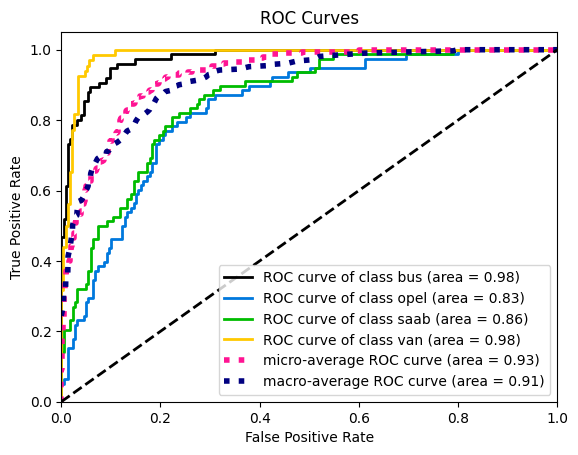

In [11]:
import scikitplot

predicted_proba = clf.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, predicted_proba)

Вывод:

Кривая ROC показывает что bus и van определяются досточно хорошо, а opel и saab существенно хуже

In [12]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

Text(0.5, 1.0, 'Explained variance ratio')

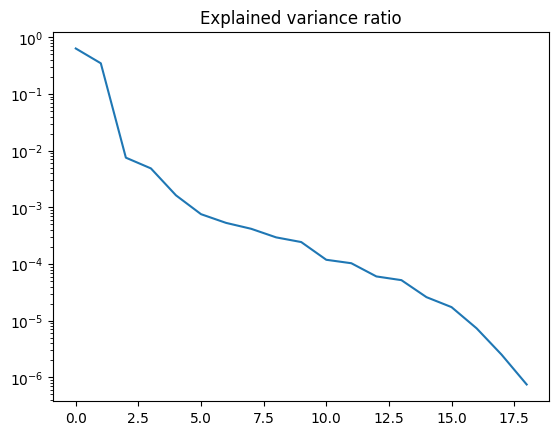

In [22]:
### YOUR CODE HERE

from sklearn.decomposition import PCA

# Проведем сокращение размерности методом PCA. Запустим PCA  с параметрами по умолчанию.

pca = PCA()
pca.fit(X_train)
# Построим график вклада каждой фичи (Variance ratio) в распознание на трейновой выборке. 

plt.yscale('log')
plt.plot( pca.explained_variance_ratio_)

plt.title("Explained variance ratio")

# print(pca.singular_values_)


Вывод:

График показывает что первые  2 фичи имеют максимальные сингулярные значения. В то же время вплоть до 15й фичи сингулярные числа убывают равномерно (в логарифмическом масштабе) и их вклад в точность распознавания будет значительным. 

#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

Вывод:

По результатам анализа сингулярных значений и для ускорения вычислений остановимся на 10 фичах, Это позволит нам не сильно потерять в точности распознавания но в то же время существенно скорить вычисления.

In [ ]:
### YOUR CODE HERE

Restrict = 10

pca = PCA(n_components = Restrict)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

In [ ]:
### YOUR CODE HERE

distributions = dict(C = [0.4,0.9, 1.0],\
   penalty = ['l2', 'l1'],\
      max_iter = [ 200,300, 400, 500],\
         solver = ['saga'])

LR = LogisticRegression(multi_class='multinomial', tol=1e-3 )
clf_g = GridSearchCV(LR, distributions).fit(X_train,y_train)

print(clf_g.best_params_)

{'C': 0.4, 'max_iter': 400, 'penalty': 'l2', 'solver': 'saga'}


Вывод:

На скоращенной выборке мы можем сократить количество итераций до 400. Остальные параметры остаются без изменений.

In [ ]:
clf = LogisticRegression(max_iter=500, tol = 1e-3, \
   C = 0.4, solver = 'saga').fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('Accuracy = ', sk.metrics.accuracy_score(y_test,y_pred,normalize=True))
print('F1 по типам ', sk.metrics.f1_score(y_test,y_pred,average = None))
print('F1 macro = ', sk.metrics.f1_score(y_test,y_pred,average = 'macro'))


Accuracy =  0.632996632996633
F1 по типам  [0.71232877 0.47058824 0.484375   0.79347826]
F1 macro =  0.6151925658217425


Вывод:

На сокращенной выборке метрики точности уменьшились ~10%, но при этом размер матрицы сократился в 2 раза

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

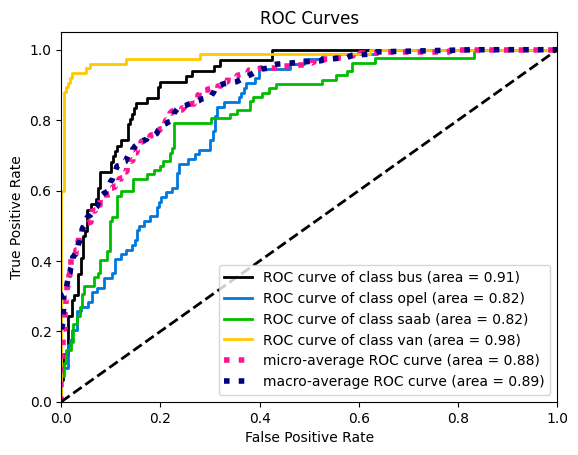

In [ ]:
predicted_proba = clf.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, predicted_proba)

Вывод:

ROC кривая показывает, что несколько ухудшились показатели для типа bus. Остальные типы изменились несущественно.

#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# YOUR CODE HERE

parameters = {'max_depth':[2,3,4,5,6,8,10]}
model = DecisionTreeClassifier()
clf = GridSearchCV(model, parameters)
clf.fit(X_train, y_train)
clf.best_params_

{'max_depth': 8}

Вывод:

оптимальная глубина дерева - 8. Анализ метрик точности показывает что переобучения не происходит.

In [ ]:
clf = DecisionTreeClassifier(max_depth = 8).fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(sk.metrics.accuracy_score(y_test,y_pred))
print(sk.metrics.f1_score(y_test,y_pred,average = None))


0.5925925925925926
[0.73015873 0.44295302 0.42307692 0.78527607]


Вывод:

Поучаемые метрики ~5% хуже показателей логистической регрессии. Однако дерево работает гораздо быстрее.

<Axes: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

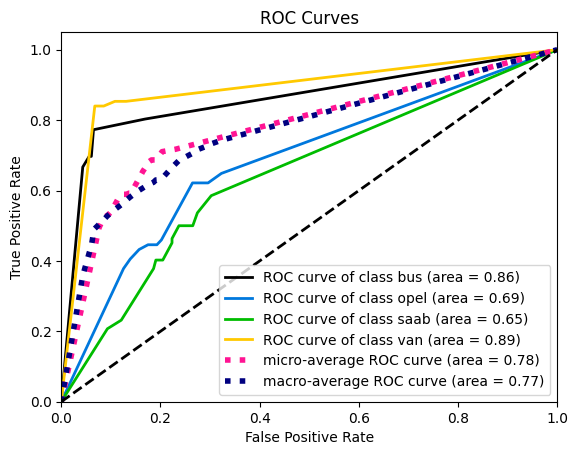

In [ ]:
predicted_proba = clf.predict_proba(X_test)
scikitplot.metrics.plot_roc(y_test, predicted_proba)

Вывод:

ROC  кривая. Мы видим что показатели дерева уже существенно (~20% ) хуже логистической регрессии.

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [ ]:
# YOUR CODE HERE
from sklearn.ensemble import BaggingClassifier

Text(0.5, 1.0, 'Зависимость качества ансамблей от количества деревьев')

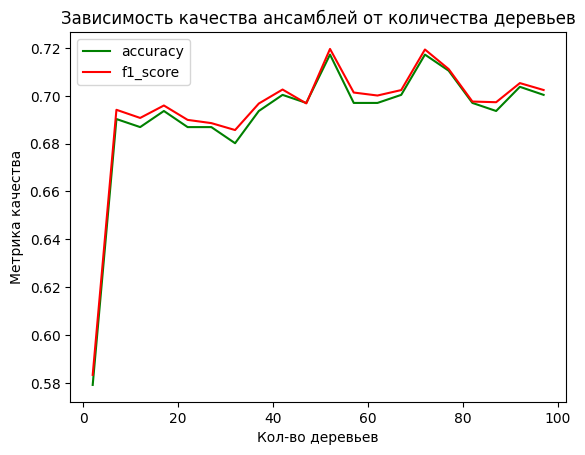

In [ ]:
N = range(2,100,5)

arr_acc = []
arr_f1 = []

for n in N:
    
    clf = BaggingClassifier(estimator = DecisionTreeClassifier(max_depth=8), n_estimators=n,
                        max_samples=X_train.shape[0], max_features=X_train.shape[1])
    clf.fit(X_train, y_train)
    bg_pred = clf.predict(X_test)

    arr_acc.append(sk.metrics.accuracy_score(bg_pred,y_test))
    arr_f1.append(sk.metrics.f1_score(bg_pred,y_test,average='macro'))

plt.plot(N, arr_acc, color='Green')
plt.plot(N, arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Кол-во деревьев')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества ансамблей от количества деревьев')

Вывод:

Уже при количестве деревьев 20-40 мы получаем точность выше чем при использовании единичного дерева с одинаковой глубиной (используем max_depth = 8). Одиночноное дерево ~0.63, а ансамбль деревьев ~0.7. Последующее увеличение количества деревьев в ансамбле не показывает гарантированного прироста точности.

Text(0.5, 1.0, 'Зависимость качества  от количества ансамблей (Logistic Regression)')

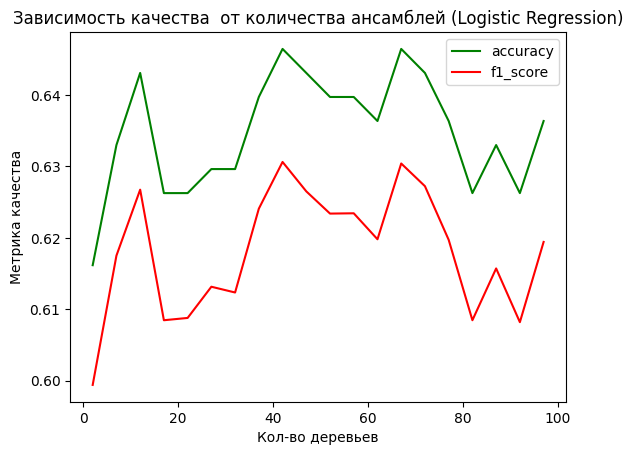

In [ ]:
N = range(2,100,5)

arr_acc = []
arr_f1 = []

for n in N:
    
    clf = BaggingClassifier(estimator = LogisticRegression(max_iter=500, \
        tol = 1e-3, solver = 'saga', C = 0.4),\
         n_estimators=n,\
            max_samples=X_train.shape[0],\
                 max_features=X_train.shape[1])
    clf.fit(X_train, y_train)
    bg_pred = clf.predict(X_test)

    arr_acc.append(sk.metrics.accuracy_score(bg_pred,y_test))
    arr_f1.append(sk.metrics.f1_score(bg_pred,y_test,average='macro'))

plt.plot(N, arr_acc, color='Green')
plt.plot(N, arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Кол-во деревьев')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества  от количества ансамблей (Logistic Regression)')

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

Вывод:

При использовании ансамблей с логистичесой регрессией мы наблюдаем незначительный рост точности до 10 ансамблей (от 0.61 до 0.64), а единичная регрессия при тех же параметрах показывала точность 0.63. Дальнейшее увеличение количества ансамблей непредсказуемо влияет на точность. В данном примере использование логистической регрессии в ансамблях неэффективно.


Text(0.5, 1.0, 'Зависимость качества Random Forest от количества деревьев')

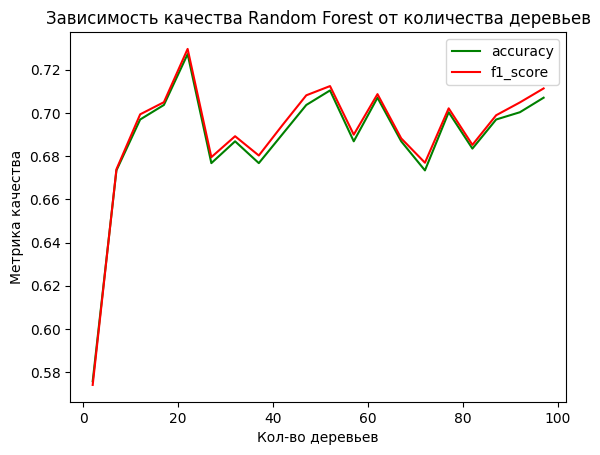

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# YOUR CODE HERE

N = range(2,100,5)

arr_acc = []
arr_f1 = []

for n in N:
    
    clf = RandomForestClassifier(
         n_estimators=n,\
            max_samples=X_train.shape[0],\
                 max_features=X_train.shape[1])
    clf.fit(X_train, y_train)
    bg_pred = clf.predict(X_test)

    arr_acc.append(sk.metrics.accuracy_score(bg_pred,y_test))
    arr_f1.append(sk.metrics.f1_score(bg_pred,y_test,average='macro'))

plt.plot(N, arr_acc, color='Green')
plt.plot(N, arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Кол-во деревьев')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Random Forest от количества деревьев')

Выводы:

Уже на 20 деревьях Random Forest показывает точность выше 0.71. При увеличении количества деревьев метрика точности колеблется в диапазоне 0.69 - 0.71. Это несколько лучше ансамбля деревьев.Но при этом ансамбль деревьев достигает своего максимума несколько позже (от 20 до 40 деревьев)

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

анализ F1 по категориям в зависимости от размера выборки
0.1  [0.56934307 0.27906977 0.41059603 0.72316384]
0.2  [0.70588235 0.41791045 0.50684932 0.75280899]
0.3  [0.67625899 0.42105263 0.47887324 0.76666667]
0.4  [0.68085106 0.38518519 0.4028777  0.78212291]
0.5  [0.64748201 0.43165468 0.45669291 0.77248677]
0.6  [0.67142857 0.42975207 0.56944444 0.77248677]
0.7  [0.65753425 0.39669421 0.52112676 0.78918919]
0.8  [0.64788732 0.4        0.51798561 0.77659574]
0.9  [0.68055556 0.43076923 0.53030303 0.77659574]
1.0  [0.70344828 0.47407407 0.5        0.8021978 ]


Text(0.5, 1.0, 'Зависимость качества Logistic Regression от размера выборки')

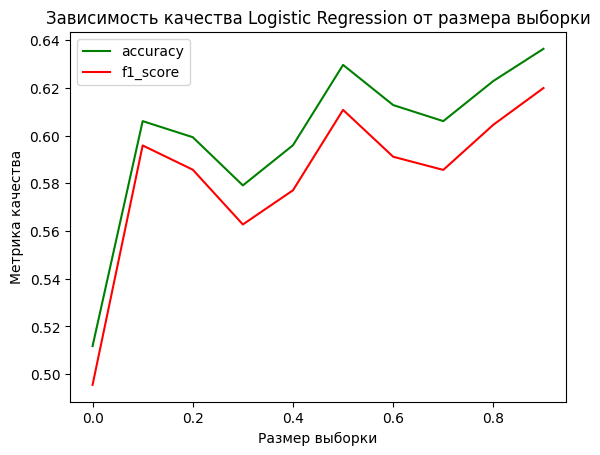

In [ ]:
# YOUR CODE HERE
from sklearn.utils import shuffle

N = 10
part = 54
arr_acc = []
arr_f1 = []

X_train, y_train = shuffle(X_train, y_train)

print('анализ F1 по категориям в зависимости от размера выборки')

for i in range(N):
    
    clf = LogisticRegression(max_iter=500, tol = 1e-3, solver = 'saga', C = 0.4)
    clf.fit(X_train[:part*(i+1)], y_train[:part*(i+1)])
    bg_pred = clf.predict(X_test)

    arr_acc.append(sk.metrics.accuracy_score(bg_pred,y_test))
    arr_f1.append(sk.metrics.f1_score(bg_pred,y_test,average='macro'))
    print('{:.1f}  {}'.format((i+1)*0.1,sk.metrics.f1_score(bg_pred,y_test,average=None)))

plt.plot([0.1*i for i in range(N)], arr_acc, color='Green')
plt.plot([0.1*i for i in range(N)], arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Размер выборки')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Logistic Regression от размера выборки')

Вывод:

Логистическая регрессия при полной выборке достигала accuracy = 0.63. При сокращении размера выборки такой показатель (и даже более высокий 0.65) достигается иногда при 20-40% выборки. Таблица значений f1 по отдельным типам показывает что сущеcтвенное влияние на рост точности оказывает прирост точности по одному или двум типа ТС, а по тем, которые сразу распознавались хорошо, прирост незначительный с увеличением размера выборки.

Text(0.5, 1.0, 'Зависимость качества Decision Tree от размера выборки')

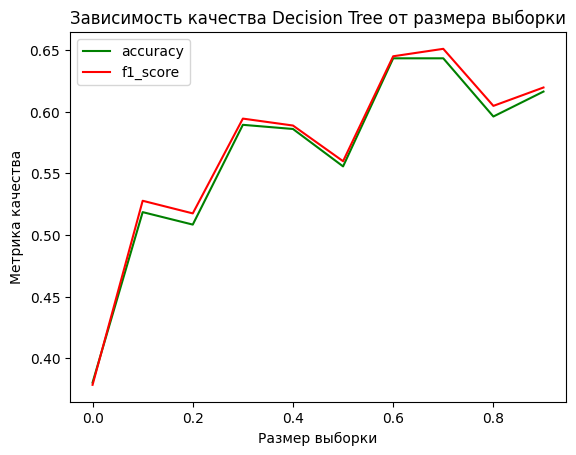

In [ ]:
# YOUR CODE HERE

N = 10
part = 54
arr_acc = []
arr_f1 = []

X_train, y_train = shuffle(X_train, y_train)

for i in range(N):
    
    clf = DecisionTreeClassifier(max_depth=8)
    clf.fit(X_train[:part*(i+1)], y_train[:part*(i+1)])
    bg_pred = clf.predict(X_test)

    arr_acc.append(sk.metrics.accuracy_score(bg_pred,y_test))
    arr_f1.append(sk.metrics.f1_score(bg_pred,y_test,average='macro'))

plt.plot([0.1*i for i in range(N)], arr_acc, color='Green')
plt.plot([0.1*i for i in range(N)], arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Размер выборки')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Decision Tree от размера выборки')

Вывод:

При 40% выборке при глубине дерева 8 точность достигает ~0.6 что сравнимо с полной выборкой. При уменьшении глубины дерева до 6 точность 0.6 достигается при 70-80% выборки

Text(0.5, 1.0, 'Зависимость качества Random Forest от размера выборки')

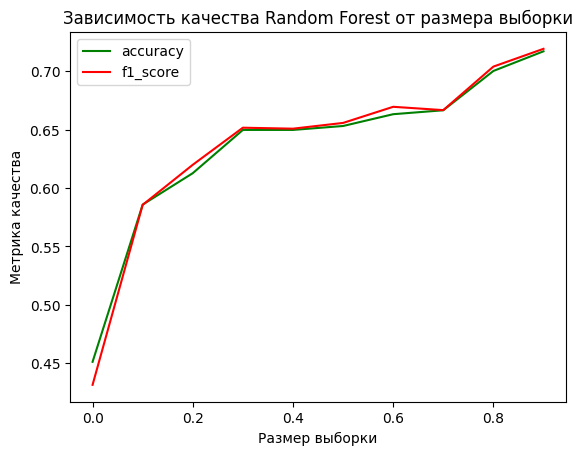

In [ ]:
# YOUR CODE HERE

N = 10
part = 54
arr_acc = []
arr_f1 = []

# X_train, y_train = shuffle(X_train, y_train)

for i in range(N):
    
    clf = RandomForestClassifier(
         n_estimators = 20,\
            max_samples=X_train[:part*(i+1)].shape[0],\
                 max_features=X_train.shape[1])
    clf.fit(X_train[:part*(i+1)], y_train[:part*(i+1)])
    bg_pred = clf.predict(X_test)

    arr_acc.append(sk.metrics.accuracy_score(bg_pred,y_test))
    arr_f1.append(sk.metrics.f1_score(bg_pred,y_test,average='macro'))

plt.plot([0.1*i for i in range(N)], arr_acc, color='Green')
plt.plot([0.1*i for i in range(N)], arr_f1, color='Red')

plt.legend(["accuracy","f1_score"])
plt.xlabel('Размер выборки')
plt.ylabel('Метрика качества')
plt.title('Зависимость качества Random Forest от размера выборки')

Вывод:

При 60% выборки точность Random Forest достигает 0.66 затем продолжает расти до 0.7

Общие выводы:

1. Зависимость от анализа количества параметров:
После анализа сингулярных значений мы сократили количество анализируемых параметров дод 10 (практически в 2 раза). Это несколько ухудшило точность на всех алгоритмах (~10%) Но существенно сократило вычислительные затраты.
2. Алгоритм GridSearchCV подбора гиперпараметров с использованием кросс-валидейшн позволяет подобрать оптимальные гиперпараметры для всех видов алгоритмов, но не гарантирует отсутствия переобучения.
3. ROC анализ позволяет оценить как общее качество точности распознавания так и точнсть по каждому отдельному типу. Также как и функци F1 при отсутствии осреднения.
4. При обьединении алгоритмов в ансамбли лучший выигрыш дает использование деревьев. Обьединение в ансамбли логистической рекгрессии практически не дает выигрыша.
5. Алгоритм Random Forest дает большую точность чем ансамбль деревьев и достигает ее быстрее.
6. На нашем датасете все алгоритмы обучаются быстрее на части выборки. От 20 до 60% выборки достаточно.

Дальнейшие направления для проработки:
1. Очевидно что по некоторым типам транспортных средств обучение проходит существенно быстрее и дает большую точность. Интересно определить от каких характеристик обучающей выборки это зависит. Анализ этих характеристик позволит использовать разные размеры  обучающей выборки для разных типов транспортных средств в нашем случае.
2. При определении оптимальных гиперпараметров нужно определить границу их оптимизации с целью избежания переобучения.
3. При умеьшении размеры выборки с предварительным перемешивание обучающей выборки, зависимость точности от размера обучающей выборки нестабильна. Это значит, что некоторые выборки меньшего размера обучают существенно лучше, чем другие. Если параметры выборки от которых зависит качество обучения то то можно заранее предьявлять их к обучающему датасету.